In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()
dir(data)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


['DESCR', 'data', 'images', 'target']

In [2]:
images = data.images
labels = data.target


images.shape, labels.shape

((400, 64, 64), (400,))

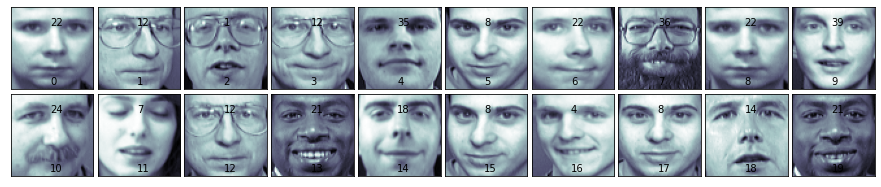

In [3]:
def show_image(images, label, how_many=5):


    ##set up figure size in inches
    fig=plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0 , right=1 ,bottom=0, top=1, hspace=0.05,wspace=0.05)
    from random import randint

    for  i in range(how_many):
        #we will print images in matrix 10,10
        index = randint(0,images.shape[0])

        p = fig.add_subplot(10,10, i + 1 ,xticks=[],yticks=[])

        p.imshow( images[index], cmap=plt.cm.bone)
        #label the image with target value
        p.text(30, 14, str( label[index] ))
        p.text(30, 60, str(i))
        
show_image(images, labels, how_many=20)

In [4]:
from sklearn.svm import SVC
model_linear_kernel = SVC( kernel="linear")

In [5]:
images = images.reshape(-1, 64*64)

images = images / 255

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( images, labels, test_size=0.25, random_state=7)

In [7]:
model_linear_kernel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
model_linear_kernel.score(X_test, y_test)

0.0

In [9]:
index_with_glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]

In [10]:
y = np.zeros(labels.shape)

for start, end in index_with_glasses:

    y[start: end + 1] = 1

#confirm for yourself

In [11]:
X_train, X_test, y_train, y_test = train_test_split( images, y, test_size=0.25, random_state=7 )

In [12]:
model_linear_kernel = SVC(kernel = "linear" )
model_linear_kernel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

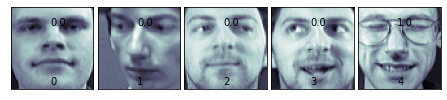

In [13]:
show_image( X_test.reshape(-1,64,64), y_test )

In [14]:
model_linear_kernel.score(X_test, y_test)

0.65

In [15]:
from sklearn.datasets import fetch_lfw_people
data = fetch_lfw_people(min_faces_per_person=60)

In [16]:
images = data.images
labels = data.target

images.shape, labels.shape

((1348, 62, 47), (1348,))

In [17]:
data.target_names[6]

'Junichiro Koizumi'

In [23]:
X = images.reshape(-1,62*47)
y = labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15, whiten=True, random_state=7)


X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

In [26]:
pca.explained_variance_ratio_[:].sum()

0.6940828

In [27]:
from sklearn.svm import SVC
model = SVC(kernel="rbf")

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C': [.01, 0.5, 1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005] }

grid = GridSearchCV(model, param_grid)

In [29]:
%timeit grid.fit(X_train_pca, y_train)

1 loop, best of 3: 5.81 s per loop


In [30]:
grid.best_params_

{'C': 50, 'gamma': 0.005}

In [31]:
best_model = grid.best_estimator_

predictions = best_model.predict(X_test_pca)
actuals      = y_test

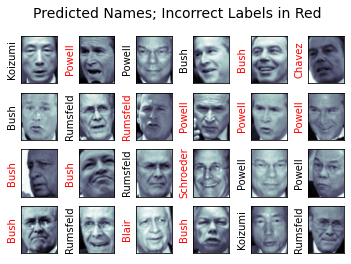

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):

    axi.imshow( X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel( data.target_names[ predictions[i] ].split()[-1], color='black' if actuals[i] == predictions[i] else 'red')
    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [33]:
from sklearn.metrics import classification_report
print(classification_report(actuals, predictions, target_names=data.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.40      0.14      0.21        29
     Colin Powell       0.67      0.71      0.69        70
  Donald Rumsfeld       0.56      0.67      0.61        33
    George W Bush       0.71      0.79      0.75       126
Gerhard Schroeder       0.30      0.29      0.29        21
      Hugo Chavez       0.58      0.39      0.47        18
Junichiro Koizumi       0.70      0.70      0.70        10
       Tony Blair       0.48      0.50      0.49        30

         accuracy                           0.63       337
        macro avg       0.55      0.52      0.53       337
     weighted avg       0.61      0.63      0.61       337

